In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
inputs = np.array([[0, 1, 0],
                   [0, 1, 1],
                   [0, 0, 0],
                   [1, 0, 0],
                   [1, 1, 1],
                   [1, 0, 1]])

outputs = np.array([[0], [0], [0], [1], [1], [1]])

In [17]:
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, inputs, outputs):
        self.inputs  = inputs
        self.outputs = outputs
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = 1/1+e^(-x)
    def sigmoid(self, x, deriv=False):
        if deriv == True:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.sigmoid(np.dot(self.inputs, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.outputs - self.hidden
        delta = self.error * self.sigmoid(self.hidden, deriv=True)
        self.weights += np.dot(self.inputs.T, delta)

    # train the neural net for 25,000 iterations
    def train(self, epochs=25000):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        prediction = self.sigmoid(np.dot(new_input, self.weights))
        return prediction

In [18]:
NN = NeuralNetwork(inputs, outputs)
NN.train()

In [19]:
example = np.array([[1, 1, 0]])
example_2 = np.array([[0, 1, 1]])

print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])

[[0.99089925]]  - Correct:  1
[[0.006409]]  - Correct:  0


Text(0, 0.5, 'Loss')

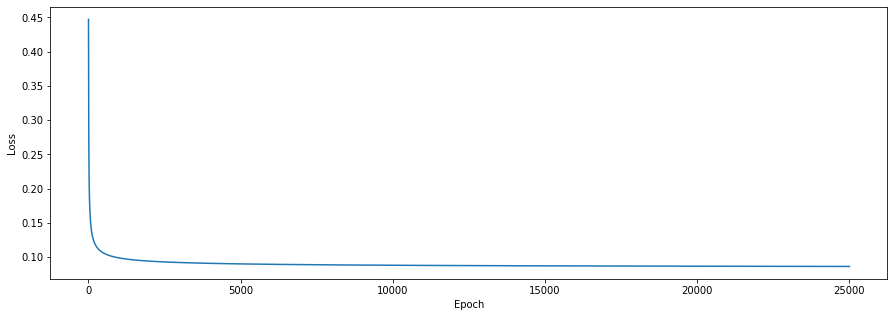

In [20]:
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')